# Introduction to Machine Learning

## Assignment 2 - Group 12

Andrei Medesan (S5130727) & Janan Jahed (S5107318) & Natalia Gayoso (S5221218)

## Part I - Overfitting Detection

a) over fitting -- This is due to the model's capacity or size being large enough to capture complicated patterns in the training data, allowing it to perform well on the validation loss at first. However, as training advances, its capacity to generalize unseen data decreases. Overfitting appears as oscillations in the validation loss, indicating that the model's performance on validation data declines while the training loss is also decreasing (Valdenegro, 2023).

b) neither -- When the training loss reaches zero, it means that the model has learned the training data well, and there is no evidence of overfitting, which occurs when the training loss continues to fall while the validation loss grows. Furthermore, the fact that the training loss is not extremely high shows that the model is not underfitting. Instead, it appears that the model absorbed the training data well, and the behavior indicates that the model obtained a decent fit to the data without overfitting or underfitting (Valdenegro, 2023).

c) underfitting -- The substantial training loss, which remains constant during training, indicates that the model is unable to capture the underlying patterns and complexities in the training data. Underfitting occurs when the model is too simplistic or lacks the capacity to correctly represent the data. The model's inability to reduce the training loss in this example implies that it is not successfully learning from the data, resulting in poor generalization to both the training and validation sets (Valdenegro, 2023).

## Part II - Splitting is Eternal? or Infinite?

When considering training a machine learning model, it is important to consider splitting the data set in order to evaluate the model's performance effectively. It is necessary to perform this method to avoid duplicating the data across the training, validation, and testing sets. In this way, the sets are separate, enhancing the model by not allowing it to overfit and it helps with informed decisions about model selection and hyperparameter tuning. Moreover, the splitting method helps prevent data leakage. This can occur when the data from the validation or testing sets are interfering with the training process, resulting in optimistic performance scores. If the splitting is not performed on the model, it presents a high risk that the validation and testing sets will not be separate, leading to a possible failure that the model will not execute well on real-world data (Sburlea & Valdenegro, 2023). A drawback of the splitting method is when the data set of the model is small. Dividing the data into three subsets would eventually lead to overfitting. Another disadvantage could be the case when the data is inbalanced. Splitting the inbalanced data could lead to subsets that have uneven class distributions, that can have an effect on the model's performance. However, the advantages outweigh the disadvantages, hence, the splitting method is recommended for the machine learning model.

Normalizing the data is not always necessary to apply for machine learning models, but it is a good practice to consider. Normalization can increase the duration of convergence during training, especially for algorithms sensitive to feature scales. Furthermore, normalization stabilizes the training process which yeilds eventually in better result scores. Considering, for instance, features with larger scales, by nor normalizing the data, these features can dominate the learning process, resulting in inaccurate model weights and poor performance (Sburlea & Valdenegro, 2023). However, it is important to note that using normalization, such as *Min-Max Scaler or Z-score* can potentially result in a loss of information from the data. Another disadvantage of normalizing is its sensitivity to outliers, which can lead to issues in the model's performance. It is imperative to check the data set of the model for outliers before applying the normalization method.

## Part III - Model Selection and Generalization

For this part of the assignment, we chose the *digits* dataset for our model. The regression machine learning was implemented in each of the four models to train on the selected dataset.

### Importing the necessary libraries

The following libraries are used throughout the code for our models:

In [131]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


### Load the dataset


The following code shows the process of loading the data set in Python.



In [132]:
# load the digits dataset
digits = datasets.load_digits()

# create a DataFrame from the digits dataset
digits_df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
digits_df['target'] = digits.target

# split the data into remaining columns (X) and target (y)
X = digits_df.drop('target', axis=1)
y = digits_df['target']

### The model trained on 10% of the data


In this step we first create a list to store all the accuracy stores, then we proceed to initialize the size of our subset (10%) to train the algorithm with. Furthermore, we iterate through the training process 10 times to get an average of the results. Within this loop, we start our training process. As instructed, first we randomly sample data without replacement to create a smaller training set. Then we split the data into training (70%) and testing (30%) sets and train a logistic regression on the subset and get the accuracy of the model. After running the code, we obtained a 89% accuracy for training 10% of the training data set which is quite low.

In [133]:
# create a list in which to store all the accuracy scores
accuracy_lst = []

subset_size = 0.1

for i in range(10):
    # calculate the number of samples for the subset
    number_samples = int(len(X) * subset_size)

    # randomly sample the data without replacement to create a smaller training set
    random_indices = np.random.choice(len(X), number_samples, replace=False)
    X_subset = X.iloc[random_indices]
    y_subset = y.iloc[random_indices]

    # split the subset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.3, random_state=i)

    # create and train a logistic regression model on the subset
    logistic_model = LogisticRegression(max_iter=1000)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    logistic_model.fit(X_train_scaled, y_train)

    # Normalize the features on the testing data
    X_test_normalized = scaler.transform(X_test)

    # Make predictions on the normalized test data
    predictions = logistic_model.predict(X_test_normalized)

    # Calculate and print the accuracy score
    accuracy = accuracy_score(y_test, predictions)
    accuracy_lst.append(accuracy)

# create a list in which to store the means of the accuracy scores obtained
average_data = []
average_data.append(np.mean(accuracy_lst))
print(f"Average of the accuracy: {average_data}")

Average of the accuracy: [0.8870370370370371]


### The model trained on 30% of the data


This code repeats the same process as the previous code, however the size of the subset changes. In this step we first create a list to store all the accuracy stores, then we proceed to initialize the size of our subset (30%) to train the algorithm with. Furthermore, we loop through the training process 10 times to get an average of the results. Within this loop, we start our training process. As instructed, first we randomly sample data withour replacement to create a smaller training set. Then we split the data into training (70%) and testing (30%) sets and train a logistic regression on the subset and get the accuracy of the model. After running the code, we obtained a 94% accuracy for training 30% of the training data set which is higher than the previous results with a smaller subset.

In [134]:
accuracy_lst = []
subset_size = 0.3

for i in range(10):
    # Calculate the number of samples for the subset
    num_samples = int(len(X) * subset_size)

    # Randomly sample the data without replacement to create a smaller training set
    random_indices = np.random.choice(len(X), num_samples, replace=False)
    X_subset = X.iloc[random_indices]
    y_subset = y.iloc[random_indices]

    # Split the subset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.3, random_state=i)

    # Create and train a logistic regression model on the subset
    logistic_model = LogisticRegression(max_iter=1000)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    logistic_model.fit(X_train_scaled, y_train)

    # Normalize the features on the testing data
    X_test_normalized = scaler.transform(X_test)

    # Make predictions on the normalized test data
    predictions = logistic_model.predict(X_test_normalized)

    # Calculate and print the accuracy score
    accuracy = accuracy_score(y_test, predictions)
    accuracy_lst.append(accuracy)

average_data.append(np.mean(accuracy_lst))
print(f"Average of the accuracy: {average_data[len(average_data) - 1]}")

Average of the accuracy: 0.9364197530864196


### The trained model on 50% of the data

This code repeats the same process as the previous codes, however the size of the subset changes again. In this step we first create a list to store all the accuracy stores, then we proceed to initialize the size of our subset (50%) to train the algorithm with. Furthermore, we loop through the training process 10 times to get an average of the results. Within this loop, we start our training process. As instructed, first we randomly sample data withour replacement to create a smaller training set. Then we split the data into training (70%) and testing (30%) sets and train a logistic regression on the subset and get the accuracy of the model. After running the code, we obtained a 95% accuracy for training 50% of the training data set which is again higher than the previous results with a smaller subset.

In [135]:
accuracy_lst = []
subset_size = 0.5

for i in range(10):
    # Calculate the number of samples for the subset
    num_samples = int(len(X) * subset_size)

    # Randomly sample the data without replacement to create a smaller training set
    random_indices = np.random.choice(len(X), num_samples, replace=False)
    X_subset = X.iloc[random_indices]
    y_subset = y.iloc[random_indices]

    # Split the subset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.3, random_state=i)

    # Create and train a logistic regression model on the subset
    logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    logistic_model.fit(X_train_scaled, y_train)

    # Normalize the features on the testing data
    X_test_normalized = scaler.transform(X_test)

    # Make predictions on the normalized test data
    predictions = logistic_model.predict(X_test_normalized)

    # Calculate and print the accuracy score
    accuracy = accuracy_score(y_test, predictions)
    accuracy_lst.append(accuracy)

average_data.append(np.mean(accuracy_lst))
print(f"Average of the accuracy: {average_data[len(average_data) - 1]}")

Average of the accuracy: 0.9488888888888889


### The trained model on 100% of the data

In this case no subset is needed since we are using all of our data to train.Hence we simply split the x and y data of the whole set into training and testing with a 30% test size and 70% train size and then perform the logistic regression exactly as implemented in the codes above. After running the code, we obtained an accuracy of almost 96% which is again higher than all the accuracies we obtained previously.

In [136]:
accuracy_lst = []
subset_size = 1.0

for i in range(10):
    # Split the subset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Create and train a logistic regression model on the subset
    logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    logistic_model.fit(X_train_scaled, y_train)

    # Normalize the features on the testing data
    X_test_normalized = scaler.transform(X_test)

    # Make predictions on the normalized test data
    predictions = logistic_model.predict(X_test_normalized)

    # Calculate and print the accuracy score
    accuracy = accuracy_score(y_test, predictions)
    accuracy_lst.append(accuracy)

average_data.append(np.mean(accuracy_lst))
print(f"Average of the accuracy: {average_data[len(average_data) - 1]}")

Average of the accuracy: 0.9638888888888888


### Bar plot for the average of all accuracies of all four models

The average scores of the accuracies for each of the four models were stored in the *average_data* list. Using the means, the bar plot (Holtz, 2023) was implemented in order to show how the accuracy is increasing over the four models.

Accuracies of all trained models: [0.8870370370370371, 0.9364197530864196, 0.9488888888888889, 0.9638888888888888]


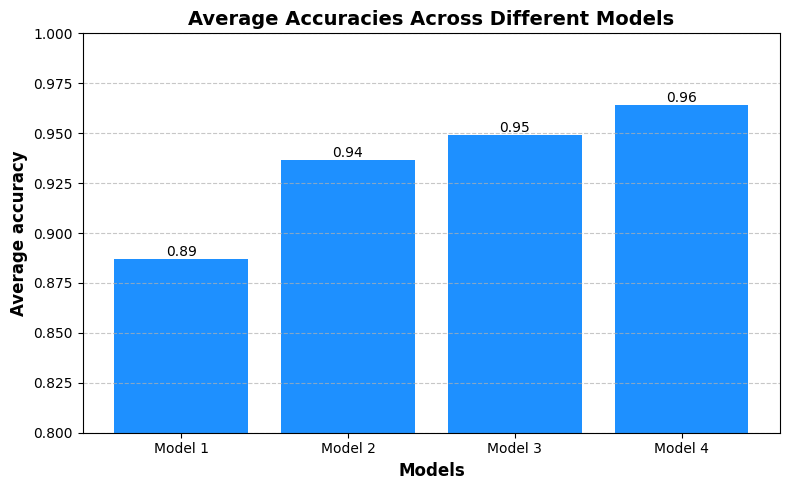

In [137]:
# print the average of all accuracies obtained from the four models
print(f"Accuracies of all trained models: {average_data}")

# create the bar plot to show how the means increased from model 1 to 4
labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

plt.figure(figsize=(8, 5))
graph = plt.bar(labels, average_data, color='dodgerblue')
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Average accuracy', fontsize=12, fontweight='bold')
plt.title('Average Accuracies Across Different Models', fontsize=14, fontweight='bold')

# add the actual values on top of the bars
for bar, value in zip(graph, average_data):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# add grid lines and adjust the y-axis to be more readable
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.8, 1.0)

plt.tight_layout()
plt.show()

### The linear graph of the accuracies of all four models

For further analysis, another plot (Sannikov, 2022) was implemented to give a different perspective of the increasing values of the average scores obtained in our models.

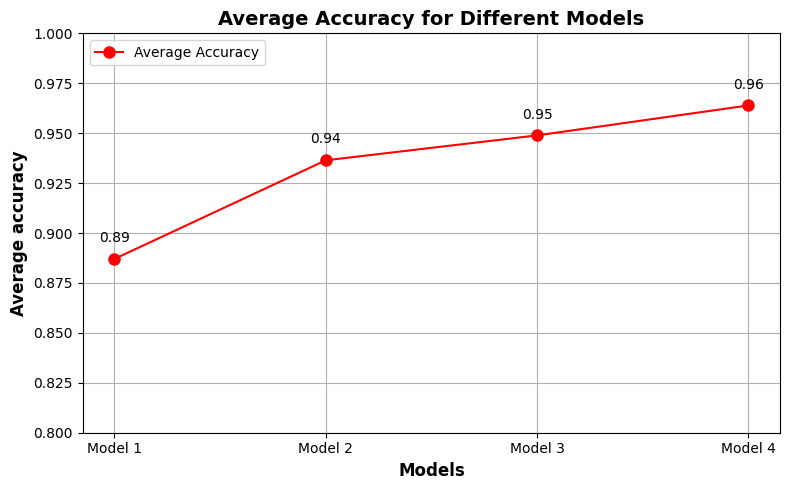

In [138]:
labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

# create the plot
plt.figure(figsize=(8, 5))
plt.plot(labels, average_data, marker='o', linestyle='-', color='red', markersize=8)

plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Average accuracy', fontsize=12, fontweight='bold')
plt.title('Average Accuracy for Different Models', fontsize=14, fontweight='bold')


for label, value in zip(labels, average_data):
    plt.annotate(f'{value:.2f}', (label, value), textcoords="offset points", xytext=(0, 10), ha='center', va='bottom', fontsize=10)

plt.legend(['Average Accuracy'], loc='upper left')

# Set y-axis limits if needed
plt.ylim(0.8, 1.0)

plt.grid(True)
plt.tight_layout()
plt.show()

## Observations

As can be observed from the results obtained, smaller data subset sizes for training result in higher prediction errors and vice versa, which is expected as more extensive data allows a model to learn more efficiently and to generalize, even for unseen data. The accuracy not only increases with the subset size, but we can also observe that the gap difference between the accuracy values obtained, decreases as the subset increases in size.

We have determined that the random initialization increases the variability in our results, as the subset changes each iteration, which creates fluctuations between runs of the same subset size. Because of this, we decided to run each of the models ten times and get the accuracy value for each. Further on, we implemented a list that calculates the average of the accuracies obtained by each model in order to plot them more precisely.

Regarding the bar plot, it can be observed that the performance of the four models (average accuracy) is increasing as the training set (subset size) is also increasing. However, this difference can be observed more clearly in the linear plot.

## Conclusion

To conclude, the results imply that training the model on higher percentages of the overall data will lead to better performance of the model. This is due to the fact that a larger data for the model to use in the training stage will provide the algorithm with more information to achieve a higher accuracy.

## References:

Dr. Sburlea, A. & Dr. Valdenegro, M. (2023). Introduction to Machine Learning (for AI) Cross Validation. *University of Groningen*. https://brightspace.rug.nl//content/enforced/243058-WBAI056-05.2023-2024.1/lecture5_cross_validation1.pdf?_&d2lSessionVal=ySVTFAa2aGz1SvK6cujHSnXrO&ou=243058

Dr. Valdenegro, M. (2023). Introduction to Machine Learning (for AI)
Statistical Learning Theory. *University of Groningen*. https://brightspace.rug.nl//content/enforced/243058-WBAI056-05.2023-2024.1/lecture7_statistical_learning_theory.pdf?_&d2lSessionVal=PY9Kz3Ms0OBmhgL1eFJTOUQVa&ou=243058

Holtz, Y. (2023). Barplot. *The Python Graph Gallery*. https://python-graph-gallery.com/barplot/

Sannikov, A. (2022). How to make your plots appealing in Python. *Dataquest*
https://www.dataquest.io/blog/how-to-make-your-plots-appealing-in-python/






